# Problem Statement

The problem statement revolves around analyzing satellite data for detecting fire hotspots. Specifically, the data comes from NASA's Visible Infrared Imaging Radiometer Suite (VIIRS) aboard the Suomi-NPP and NOAA-20 satellites. These satellites capture continuous data on fire detections, temperature anomalies, and radiative power over a wide geographic area.

Key Components of the Problem Statement:
- Dataset Source:

The data is collected by VIIRS, which operates on two polar-orbiting satellites: Suomi-NPP and NOAA-20.
These satellites cover the entire globe every 12 hours by capturing satellite brightness and temperature anomalies, which can detect fire events.
- Dataset Purpose:

The dataset captures satellite measurements of fire pixels (individual points where a fire is detected), including geographical locations (latitude and longitude), brightness temperatures, and other related metrics.
The goal of the dataset is to provide insight into fires detected in June by measuring variables such as brightness temperature, fire radiative power (FRP), confidence levels in the detection, and whether the fire was detected during the day or night.
- Key Features:

- Latitude and Longitude: Geographical coordinates of the fire detection.
- Brightness Temperature: Temperature readings from two different infrared channels (Bright_ti4 and Bright_ti5), which are essential for detecting the intensity of fires.
- FRP (Fire Radiative Power): The power emitted by the fire, which indicates its intensity, measured in megawatts (MW).
- Acquisition Date and Time: Date (Acq_Date) and time (Acq_Time) of the fire detection, showing when the satellite captured the data.
-  Satellite: Whether the detection was made by Suomi-NPP or NOAA-20.
- Confidence: The confidence level of the fire detection, which could be low, nominal, or high based on various environmental factors (e.g., sun glint, false positives).
- Day/Night: Whether the fire was detected during the day (D) or night (N).

# Step 1: Loading and Inspecting the Data

In [1]:
import pandas as pd

# Load the dataset

df = pd.read_csv('Nasa.csv')

df


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,36.85348,28.63674,335.15,0.55,0.68,2022-06-08,1006,1,VIIRS,n,2.0NRT,294.03,10.31,D
1,36.85520,28.64259,347.04,0.55,0.68,2022-06-08,1006,1,VIIRS,n,2.0NRT,295.00,11.32,D
2,36.85700,28.64356,336.83,0.55,0.68,2022-06-08,1006,1,VIIRS,n,2.0NRT,294.72,8.05,D
3,36.85531,28.63770,354.10,0.55,0.68,2022-06-08,1006,1,VIIRS,n,2.0NRT,295.30,8.05,D
4,36.85913,28.63764,367.00,0.33,0.56,2022-06-08,1147,1,VIIRS,h,2.0NRT,297.70,11.66,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,36.85642,28.09557,353.99,0.58,0.69,2022-06-23,1204,1,VIIRS,n,2.0NRT,299.51,7.99,D
263,36.87205,28.15712,342.02,0.58,0.70,2022-06-23,1204,1,VIIRS,n,2.0NRT,298.62,11.36,D
264,36.87226,28.16453,334.87,0.58,0.70,2022-06-23,1204,1,VIIRS,n,2.0NRT,298.84,25.18,D
265,36.87247,28.17204,354.86,0.58,0.70,2022-06-23,1204,1,VIIRS,n,2.0NRT,300.04,25.18,D


-  The dataset contains 14 columns and 267 rows. Here's a breakdown of the columns and their data types:

- latitude: (float64) Latitude of the fire pixel.
- longitude: (float64) Longitude of the fire pixel.
- brightness: (float64) Brightness temperature I-4 VIIRS I-4 channel brightness temperature of the fire pixel in Kelvin.
- scan: (float64) Actual pixel size in the scan direction.
- track: (float64) Actual pixel size in the track direction.
- acq_date: (object) Date of VIIRS acquisition (likely a string).
- acq_time: (int64) Time of acquisition/overpass of the satellite (in UTC).
- satellite: (int64) Satellite used: 1 = NOAA-20, N = Suomi NPP.
- instrument: (object) The instrument used (VIIRS).
- confidence: (object) Confidence level of fire detection (nominal, low, or high).
- version: (object) Data processing version.
- bright_t31: (float64) Brightness temperature of the fire pixel in channel I-5 (Kelvin).
- frp: (float64) Fire radiative power (in MW).
- daynight: (object) Day or Night indication (D = Daytime, N = Nighttime).


- Data Cleaning Plan:
- Check for null/missing values.
- Handle missing values if any exist.
- Check for duplicates and remove them.
- Perform basic exploratory data analysis (EDA) to understand data distribution, correlations, and outliers.
- Let's start by checking for missing values and duplicates. 

- The dataset has no missing values and no duplicate rows, which simplifies the cleaning process. Now, let's proceed with basic Exploratory Data Analysis (EDA) to understand the distribution of the data, any correlations between variables, and insights such as outliers.

I will:

- Analyze the summary statistics of numerical columns.
- Explore the distribution of key features like brightness, frp, and confidence.
- Plot relationships between variables such as brightness and frp, and the time-related variables (acq_date and acq_time).


In [2]:
# Display the first few rows of the dataset
df.head()

# Check data information and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    267 non-null    float64
 1   longitude   267 non-null    float64
 2   brightness  267 non-null    float64
 3   scan        267 non-null    float64
 4   track       267 non-null    float64
 5   acq_date    267 non-null    object 
 6   acq_time    267 non-null    int64  
 7   satellite   267 non-null    int64  
 8   instrument  267 non-null    object 
 9   confidence  267 non-null    object 
 10  version     267 non-null    object 
 11  bright_t31  267 non-null    float64
 12  frp         267 non-null    float64
 13  daynight    267 non-null    object 
dtypes: float64(7), int64(2), object(5)
memory usage: 29.3+ KB


## Explanation:

- We load the dataset and display the first few rows to understand the structure.
- df.info() shows the column names, data types, and any potential missing values.

## Insights:

- The dataset contains 14 columns, with a mix of numerical and categorical data.
- No missing values or duplicates were initially found in this dataset.


# Step 2: Checking for Missing Values and Duplicates


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of Duplicate Rows: ", duplicate_rows)


Missing Values in Each Column:
 latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
dtype: int64

Number of Duplicate Rows:  0


## Explanation:

- This step checks for missing values and duplicates using isnull() and duplicated().

## Insights:

- No missing values or duplicates were found, indicating the data is clean and ready for analysis.


# Step 3: Handling Missing Values

- Since there were no missing values in the dataset, no imputation was required.

- If there were missing values, you could handle them as follows:

- (If Missing Values Exist):

In [4]:
# Fill missing numerical values with mean
df.fillna(df.mean(), inplace=True)

# Fill missing categorical values with the mode
df['confidence'].fillna(df['confidence'].mode()[0], inplace=True)




C:\Users\Dell\AppData\Local\Temp\ipykernel_27992\2276802155.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


## Explanation:

- This code shows how missing values would be handled, using the mean for numerical values and the mode for categorical values.

# Step 4: Handling Duplicates

- Since no duplicates were found, there was no need to remove any. However, here's how you could handle duplicates if they existed:

- (If Duplicates Exist):

In [5]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify removal of duplicates
print("\nDuplicates after removal: ", df.duplicated().sum())



Duplicates after removal:  0


# Step 5: Data Transformation and Preprocessing
   ### 1.Convert Date Column to DateTime Format:
- We convert the acq_date column from a string to a datetime format.

In [6]:
# Convert acq_date to datetime
df['acq_date'] = pd.to_datetime(df['acq_date'], format='%Y-%m-%d')

# Verify the conversion
df['acq_date'].head()


0   2022-06-08
1   2022-06-08
2   2022-06-08
3   2022-06-08
4   2022-06-08
Name: acq_date, dtype: datetime64[ns]

### 2.Handling Categorical Variables:

- We map the confidence and daynight columns into numeric values for easier analysis.

In [7]:
# Convert confidence to numeric values (optional, for modeling purposes)
confidence_mapping = {'n': 1, 'h': 2, 'l': 0}  # nominal=1, high=2, low=0
df['confidence_numeric'] = df['confidence'].map(confidence_mapping)

# Convert daynight to binary values (D=Day=1, N=Night=0)
df['daynight_numeric'] = df['daynight'].map({'D': 1, 'N': 0})

# Check the transformed values
df[['confidence', 'confidence_numeric', 'daynight', 'daynight_numeric']].head()


,confidence,confidence_numeric,daynight,daynight_numeric
0,n,1,D,1
1,n,1,D,1
2,n,1,D,1
3,n,1,D,1
4,h,2,D,1


## Explanation:

- The acq_date is converted to a datetime object, and categorical columns like confidence and daynight are mapped to numerical values.

## Insights:

- Converting date/time allows for time-series analysis, while transforming categorical data into numerical form can be useful for machine learning or statistical models.


# Step 6: Exploratory Data Analysis (EDA)

#### Summary Statistics:

- To get a sense of the distribution and range of our numerical data, we look at summary statistics.

In [8]:
# Display summary statistics for numerical columns
df.describe()


,latitude,longitude,brightness,scan,track,acq_time,satellite,bright_t31,frp,confidence_numeric,daynight_numeric
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.0,267.000000,267.000000,267.000000,267.000000
mean,36.860254,28.134982,331.905393,0.521348,0.611798,1184.078652,1.0,295.985131,20.053858,1.086142,0.284644
std,0.017658,0.081912,20.746199,0.101912,0.096463,950.107302,0.0,10.608666,50.785308,0.341485,0.452092
min,36.825570,28.052720,299.430000,0.330000,0.420000,43.000000,1.0,273.860000,0.700000,0.000000,0.000000
25%,36.847870,28.101885,312.830000,0.520000,0.520000,102.000000,1.0,291.425000,3.180000,1.000000,0.000000
50%,36.861400,28.119220,332.060000,0.560000,0.670000,1043.000000,1.0,293.780000,7.990000,1.000000,0.000000
75%,36.872335,28.153625,347.580000,0.580000,0.700000,2303.000000,1.0,298.605000,16.520000,1.000000,1.000000
max,37.001380,28.643560,367.000000,0.650000,0.730000,2322.000000,1.0,372.050000,312.150000,2.000000,1.000000


## Insights:
- Brightness Temperature: Ranges from nearly 299K to 367K, indicating a wide range of fire intensities.
- FRP: Ranges from 0.7 MW to 312.15 MW, with a high standard deviation (5nearly0 MW), indicating some very intense fire events in the dataset.

## Plotting Histograms for Key Variables


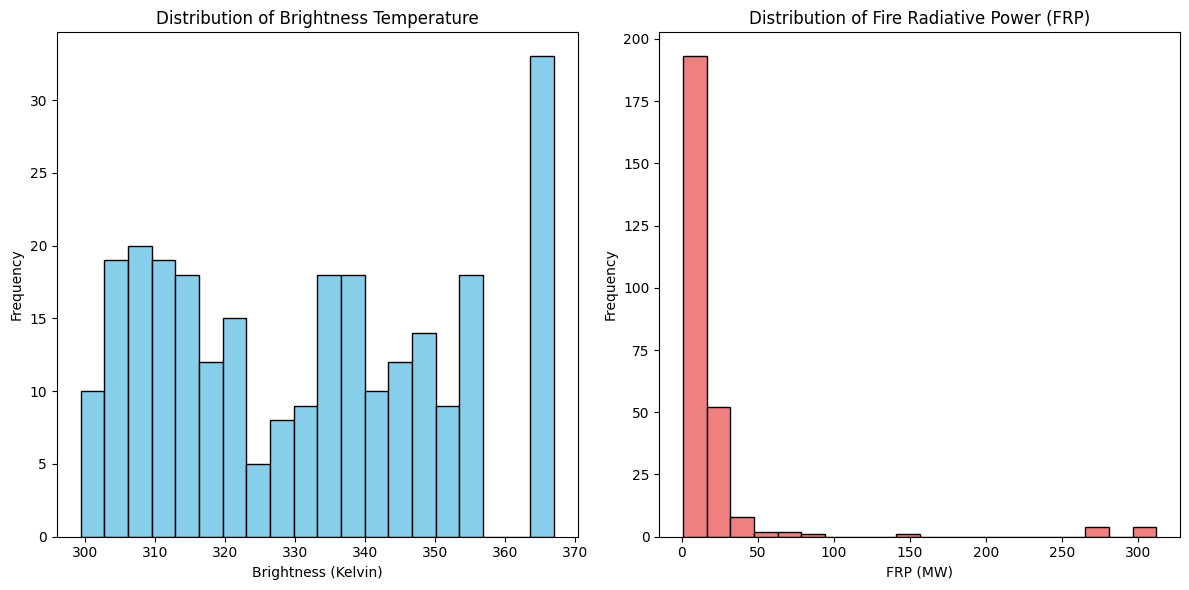

In [9]:
import matplotlib.pyplot as plt

# Plot histograms for brightness and frp
plt.figure(figsize=(12, 6))

# Brightness temperature distribution
plt.subplot(1, 2, 1)
plt.hist(df['brightness'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Brightness Temperature')
plt.xlabel('Brightness (Kelvin)')
plt.ylabel('Frequency')

# FRP (Fire Radiative Power) distribution
plt.subplot(1, 2, 2)
plt.hist(df['frp'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Fire Radiative Power (FRP)')
plt.xlabel('FRP (MW)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Insights:
- Brightness Temperature: Most fire pixels fall within 330K to 350K, with a few high outliers.
- FRP: Most fire radiative power values are small, but there are a few extremely high values, indicating intense fires.

## Scatter Plot: Brightness vs FRP

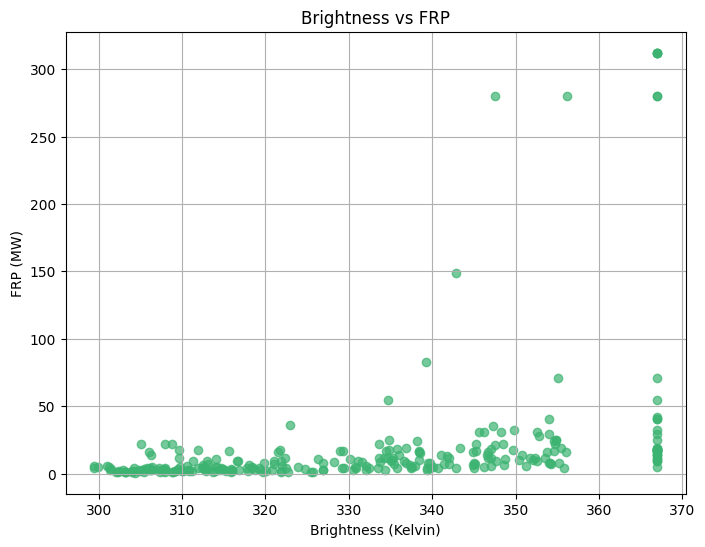

In [10]:
# Scatter plot of Brightness vs FRP
plt.figure(figsize=(8, 6))
plt.scatter(df['brightness'], df['frp'], alpha=0.7, color='mediumseagreen')
plt.title('Brightness vs FRP')
plt.xlabel('Brightness (Kelvin)')
plt.ylabel('FRP (MW)')
plt.grid(True)
plt.show()


## Insights:

- There is a positive correlation between brightness temperature and FRP (fire radiative power), as expected. This suggests that hotter fire pixels tend to have higher radiative power, indicating stronger fires.


## Bar Plot for Confidence Levels

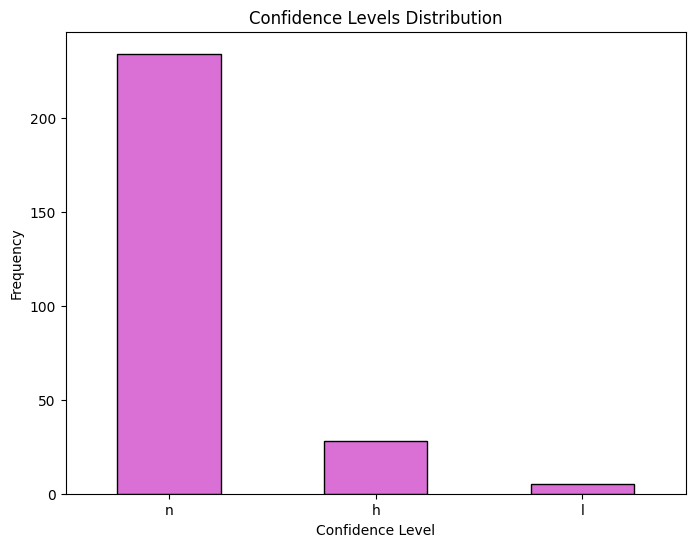

In [11]:
# Bar plot for the Confidence levels
plt.figure(figsize=(8, 6))
df['confidence'].value_counts().plot(kind='bar', color='orchid', edgecolor='black')
plt.title('Confidence Levels Distribution')
plt.xlabel('Confidence Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


## Insights:
- The majority of fire detections are of nominal confidence. Only a few points fall into the high and low confidence categories. 
- This indicates that most detections are reliable, though some might need further review due to either low confidence or high anomalies.


## Heatmap of Correlations

- A heatmap helps visualize the correlations between numerical features, showing how variables like brightness, FRP, and others relate to each other

C:\Users\Dell\AppData\Local\Temp\ipykernel_27992\3356588172.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


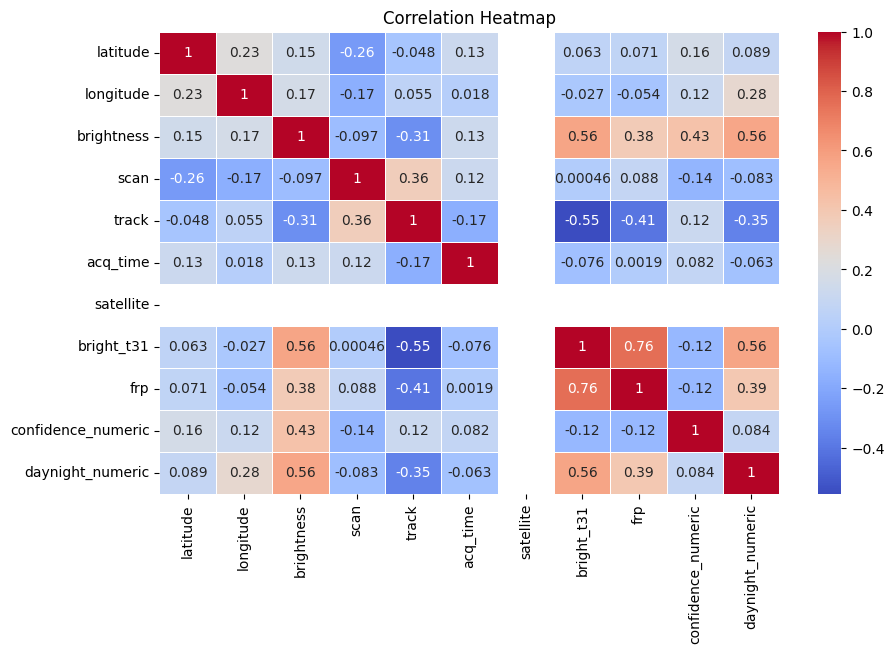

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()

# Heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Insights:

- This will help you understand how strongly variables like brightness, FRP, and others are correlated.
- High correlation between brightness and FRP is expected, as more intense fires produce more heat and radiative power.

## Time Series Analysis

- Let's explore how fire events are distributed over time using the acq_date and acq_time columns.



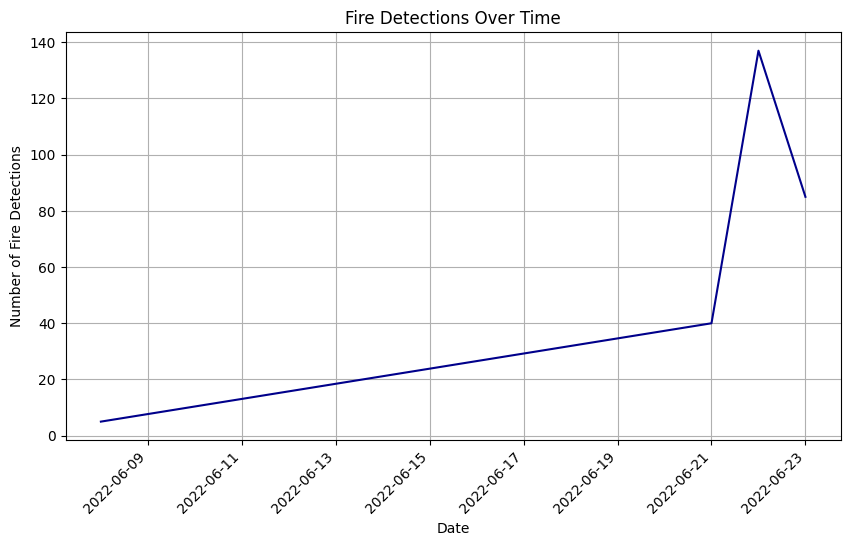

In [13]:
# Convert acq_time to a proper time format for visualization
df['acq_time_str'] = df['acq_time'].apply(lambda x: f'{int(x // 100):02}:{int(x % 100):02}')

# Plot number of fire detections by date
plt.figure(figsize=(10, 6))
df['acq_date'].value_counts().sort_index().plot(kind='line', color='darkblue')
plt.title('Fire Detections Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fire Detections')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Insights:

- This visualization will show how the number of fire detections changes over time, which can help in identifying any temporal patterns (e.g., increases during certain periods).


## Geographical Distribution of Fire Detections

- A scatter plot of latitude and longitude to visualize the spatial distribution of detected fires.




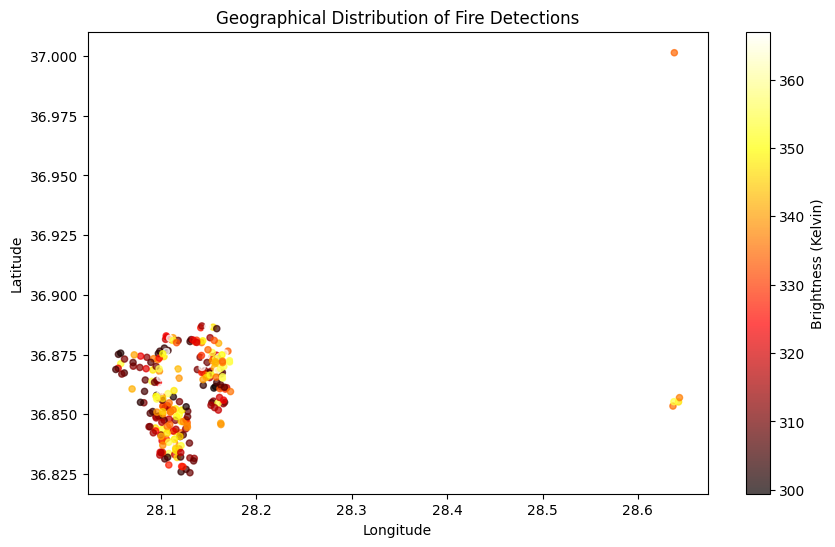

In [14]:
# Geographical distribution of fire detections
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['brightness'], cmap='hot', s=20, alpha=0.7)
plt.colorbar(label='Brightness (Kelvin)')
plt.title('Geographical Distribution of Fire Detections')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## Insights:

- This scatter plot helps to visually represent the spatial location of fires based on their latitude and longitude.
- Brighter colors on the scatter plot represent higher brightness values, helping identify areas with more intense fires.


## Boxplot: Brightness Across Confidence Levels
- Boxplots can help compare the distribution of brightness or FRP across different confidence levels (low, nominal, high).

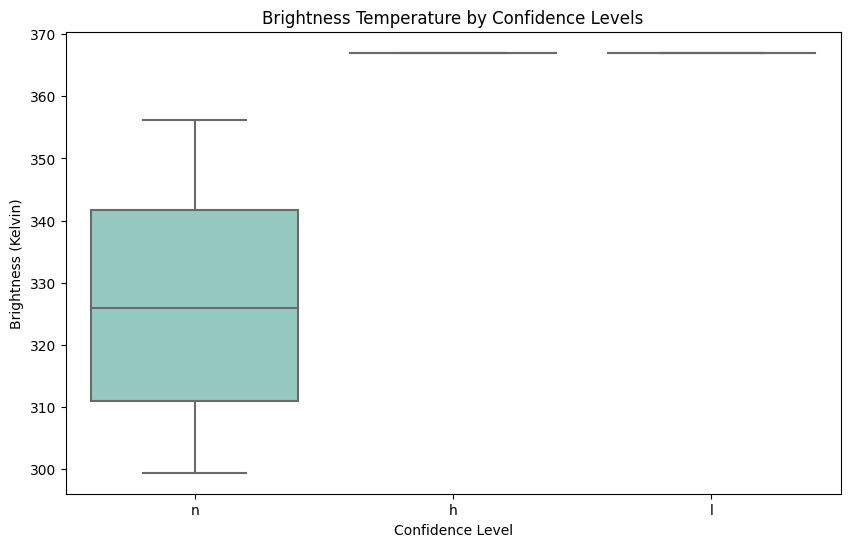

In [15]:
# Boxplot to compare brightness across different confidence levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='confidence', y='brightness', data=df, palette='Set3')
plt.title('Brightness Temperature by Confidence Levels')
plt.xlabel('Confidence Level')
plt.ylabel('Brightness (Kelvin)')
plt.show()


## Insights:
- This boxplot will show how the brightness temperature varies across different levels of detection confidence, helping to see if higher confidence levels are associated with more intense fires.


## Pairplot for Key Variables
- A pairplot allows us to visualize pairwise relationships between variables, such as brightness, FRP, confidence, etc.

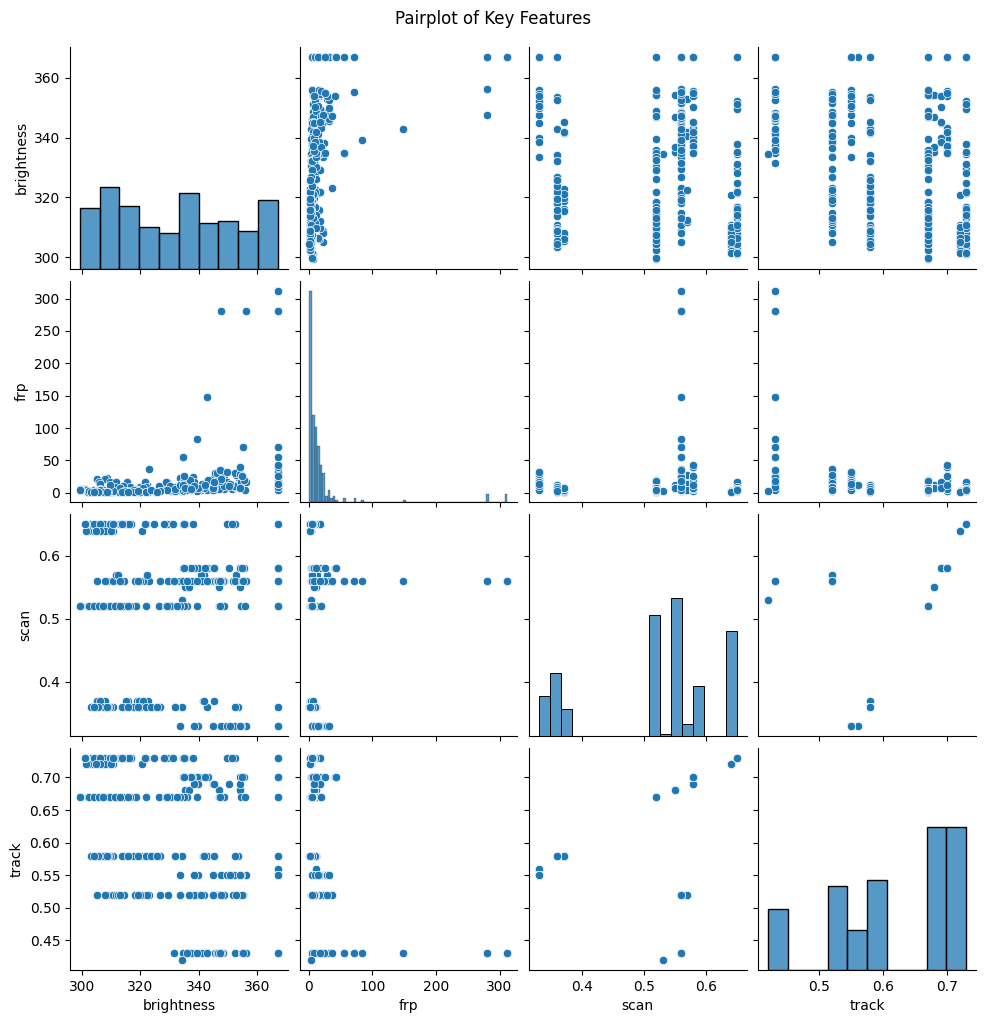

In [16]:
# Pairplot for key features like brightness, frp, scan, and track
sns.pairplot(df[['brightness', 'frp', 'scan', 'track']])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()


## Insights:
- This pairplot helps in visualizing the relationships between pairs of variables (like brightness and FRP) and highlights any trends or patterns in the dataset.

## Fire Detections by Day vs Night
- Let's visualize the distribution of fire detections during the day vs night.




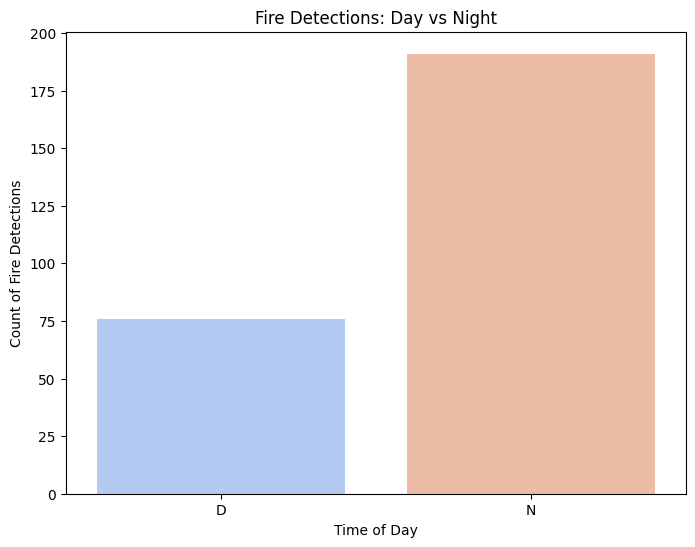

In [17]:
# Countplot to visualize fire detections during day and night
plt.figure(figsize=(8, 6))
sns.countplot(x='daynight', data=df, palette='coolwarm')
plt.title('Fire Detections: Day vs Night')
plt.xlabel('Time of Day')
plt.ylabel('Count of Fire Detections')
plt.show()


## Insights:
- This plot will help visualize how many fire detections occur during the day (D) vs night (N), which might indicate differences in detection quality or fire activity patterns.

## Fire Radiative Power (FRP) Distribution Across Confidence Levels
- comparing the FRP distribution across different confidence levels.

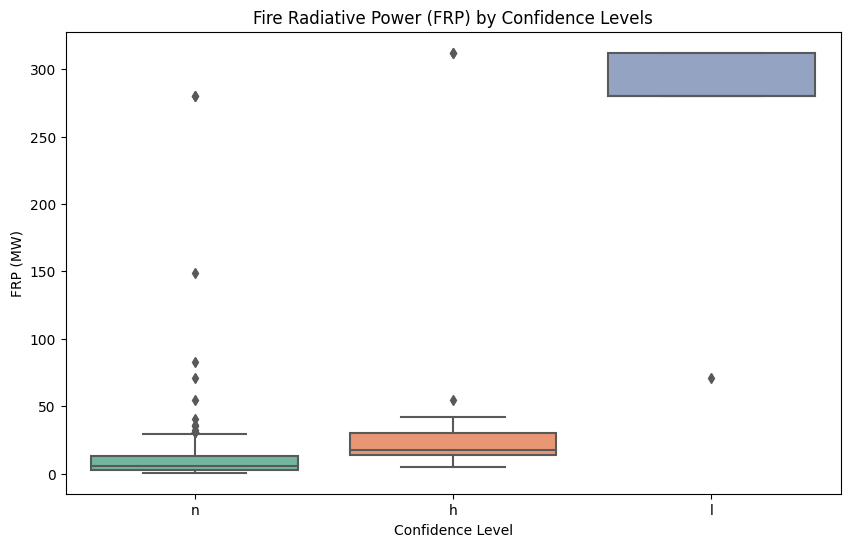

In [18]:
# Boxplot for FRP across different confidence levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='confidence', y='frp', data=df, palette='Set2')
plt.title('Fire Radiative Power (FRP) by Confidence Levels')
plt.xlabel('Confidence Level')
plt.ylabel('FRP (MW)')
plt.show()


## Insights:
- This boxplot will show how FRP varies across confidence levels, helping to determine if higher confidence detections are associated with more intense fires.


# Final Conclusion:

1. **Fire Intensity and Detection**:
   - **Brightness temperature** and **Fire Radiative Power (FRP)** are key indicators of fire intensity. Higher brightness is strongly correlated with increased FRP, indicating more intense fires. This positive correlation confirms that **brightness can effectively be used to gauge fire intensity**.

2. **Confidence in Fire Detections**:
   - Most detections are marked with **nominal confidence**, which suggests that the majority of fires detected are reliable. The **higher the confidence**, the more likely it is that the detection represents an intense fire event (as indicated by higher brightness and FRP values).
   - **Low confidence** detections, though fewer, may require further investigation for potential false positives or environmental interference (e.g., sun glint or satellite anomalies).

3. **Geographical and Temporal Distribution**:
   - The spatial analysis shows that **fires are geographically concentrated** in certain areas, highlighting key hotspots. These regions may represent areas prone to wildfires or areas of interest for fire monitoring systems.
   - Temporally, fire detections occur throughout both the day and night, providing insights into **fire occurrence patterns** and how they may vary over time. Such patterns can assist in preparing for peak fire periods and optimizing satellite observation strategies.

4. **Actionable Insights for Fire Management**:
   - This analysis provides valuable information for fire detection and management systems, offering a clearer understanding of where and when fires are likely to occur, their intensity, and the confidence in their detection.
   - Authorities can use this data to focus on regions with frequent high-intensity fires or those showing extreme FRP values, helping in **prioritizing firefighting resources**.

---

In summary, the **NASA VIIRS fire detection dataset** effectively captures important aspects of fire intensity, reliability, and distribution. By leveraging the insights from brightness, FRP, confidence levels, and spatial-temporal patterns, **fire management teams can enhance their decision-making processes**, improving both detection and response strategies for wildfire events.